<a href="https://colab.research.google.com/github/hoffera/Filtragem-x-Morfologia/blob/main/Filtragem_x_Morfologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

# Filtros espaciais

## Média - suavização

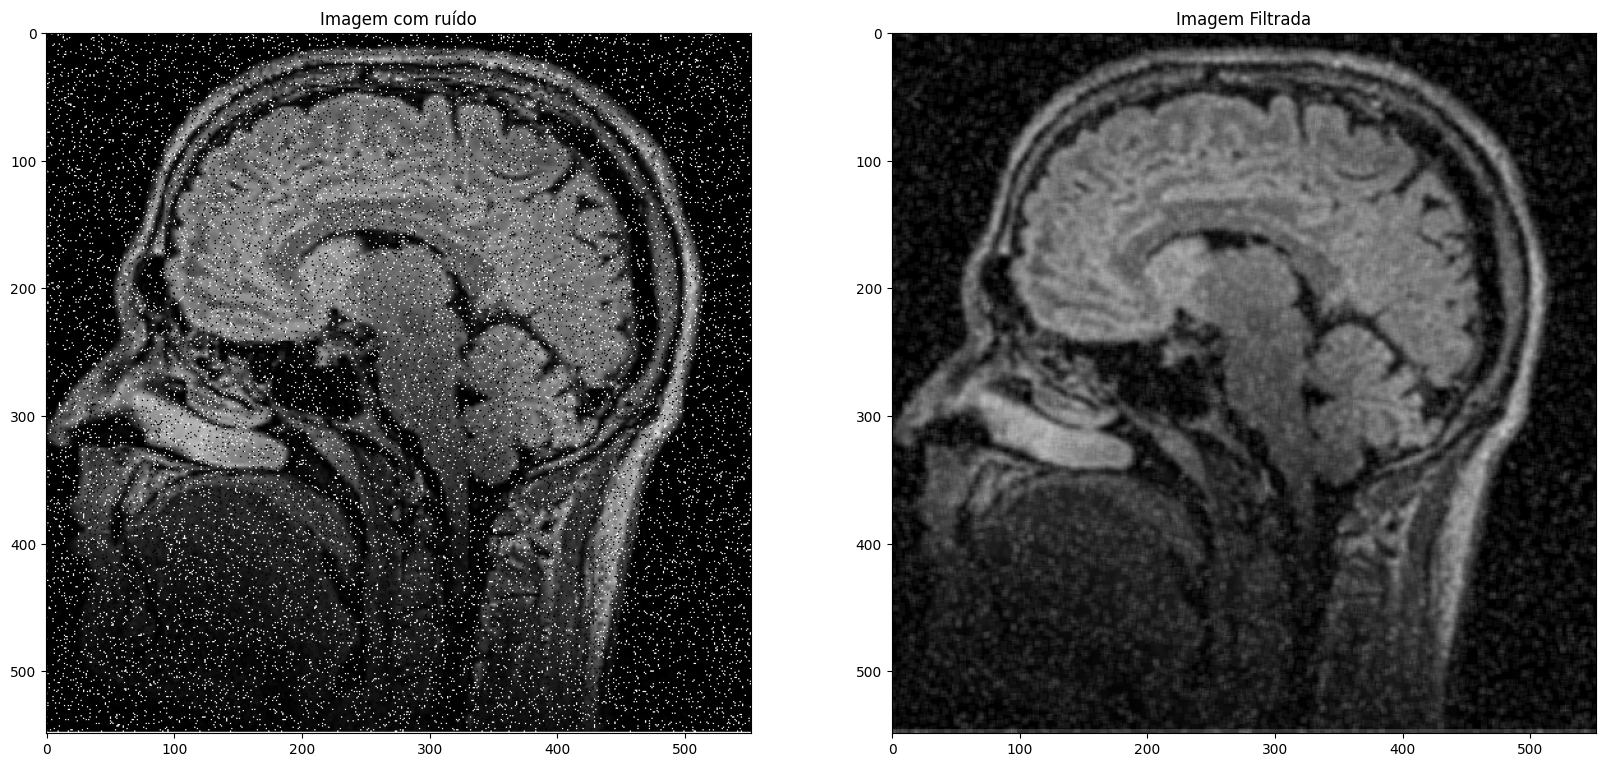

In [ ]:
img = cv2.imread('/content/head.PNG')

imgM = cv2.blur(img, (5,5))

fig = plt.figure(figsize=(20,50))
ax1 = fig.add_subplot(121)
plt.imshow(img)
plt.title("Imagem com ruído")

ax2 = fig.add_subplot(122)
plt.imshow(imgM)
plt.title("Imagem Filtrada")
plt.show()



## Mediana - suavização

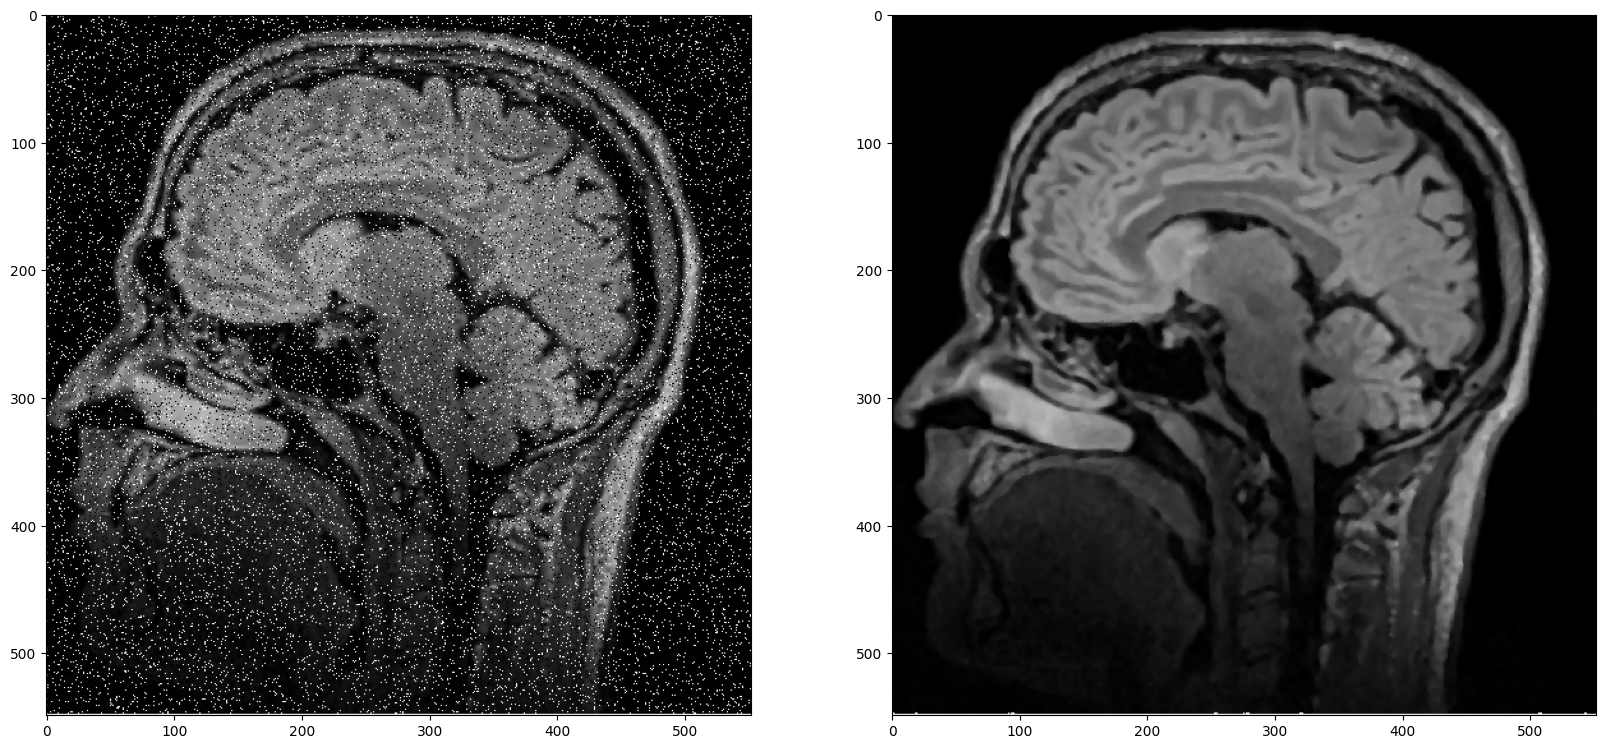

In [ ]:
img = cv2.imread('/content/head.PNG')

imgMed = cv2.medianBlur(img, 5)

fig = plt.figure(figsize=(20,50))

ax1 = fig.add_subplot(121)
plt.imshow(img)

ax2 = fig.add_subplot(122)
plt.imshow(imgMed)
plt.show()

## Laplaciano - bordas


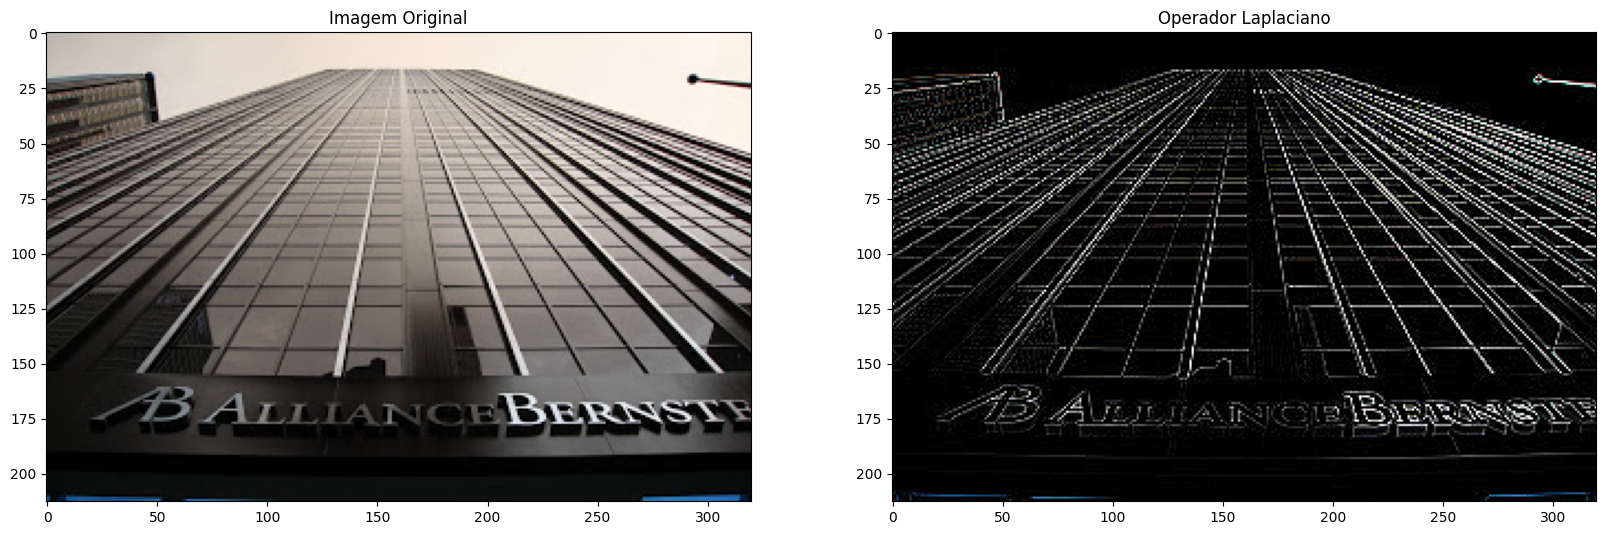

In [ ]:
img = cv2.imread('/content/predio.jpg')

lap = cv2.Laplacian(img, cv2.CV_8U)

fig = plt.figure(figsize=(20,50))

ax1 = fig.add_subplot(121)
plt.imshow(img)
plt.title("Imagem Original")

ax2 = fig.add_subplot(122)
plt.imshow(lap)
plt.title("Operador Laplaciano")

plt.show()

# Filtros frequência

## Passa-baixa

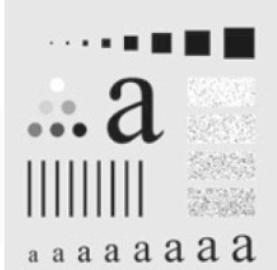

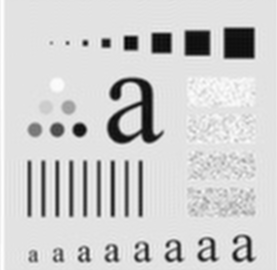

In [ ]:
img = cv2.imread('/content/imgOriginal.png',0)
image_f32 = np.float32(img) # convert from uint8 into float32

dft = cv2.dft(image_f32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
ms = np.array(magnitude_spectrum, dtype=np.float32)



#criação da filtro PB ideal
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
mask = np.zeros((rows,cols,2), np.uint8) # H(u,v)
raio = 60
mask[crow-raio:crow+raio, ccol-raio:ccol+raio] = 1   # filtragem circular


# apply mask and inverse DFT
fshift = dft_shift*mask  # se fosse multiplicação de matrizes, usaria-se @ ou np.dot()
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])



img_back = np.array(img_back, dtype=np.float32)


cv2_imshow(img)

#usar para normalizar a imagem e poder exibir com a imshow() da opencv para deixar entre 0 e 255
filtered_img = np.abs(img_back)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)

cv2_imshow(filtered_img)


##  Passa-alta via Transformada de Fourier

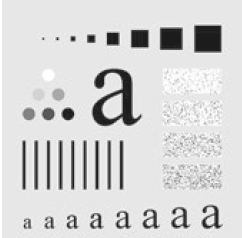

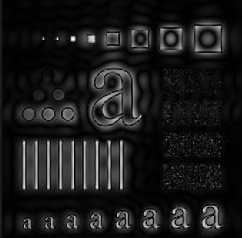

In [ ]:
#criação da filtro PA
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
mask = np.ones((rows,cols,2), np.uint8)
raio = 10
mask[crow-raio:crow+raio, ccol-raio:ccol+raio] = 0


# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)  #inversa da fft
img_back = cv2.idft(f_ishift)        #inversa da dft
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])  #recuperando a imagem capturando a magnitude (intesidade)


img_back = np.array(img_back, dtype=np.float32)



#usar para normalizar a imagem e poder exibir com a imshow() da opencv
filtered_img = np.abs(img_back)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)


cv2_imshow(img)

cv2_imshow(filtered_img)



# Operações morfológicas

## Dilatação

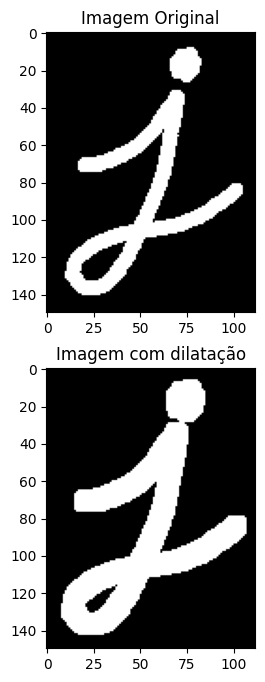

In [ ]:
img = cv.imread('/content/j.png')
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.uint8)
dilation  = cv.dilate(img,kernel,iterations = 1)


fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
plt.imshow(img)
plt.title("Imagem Original")

ax2 = fig.add_subplot(212)
plt.imshow(dilation )
plt.title("Imagem com dilatação")

plt.show()

## Erosão

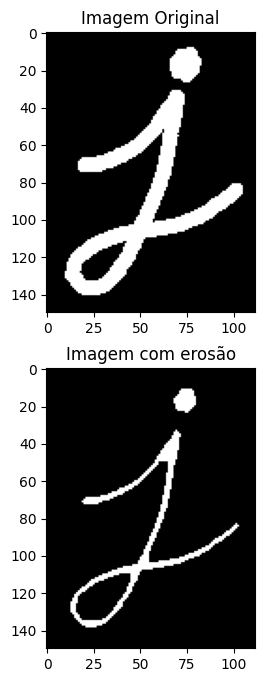

In [ ]:
img = cv.imread('/content/j.png')
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)


fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
plt.imshow(img)
plt.title("Imagem Original")

ax2 = fig.add_subplot(212)
plt.imshow(erosion)
plt.title("Imagem com erosão")

plt.show()

## Abertura

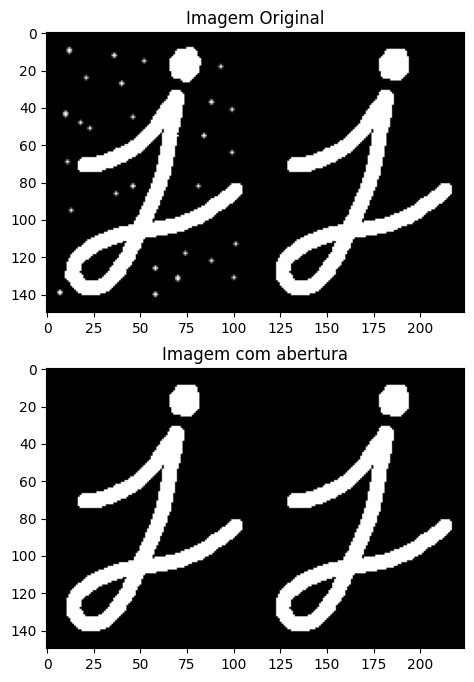

In [ ]:
img = cv2.imread('/content/opening.png')

kernel = np.ones((5,5),np.uint8)
abertura = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
plt.imshow(img)
plt.title("Imagem Original")

ax2 = fig.add_subplot(212)
plt.imshow(abertura)
plt.title("Imagem com abertura")

plt.show()

## Fechamento

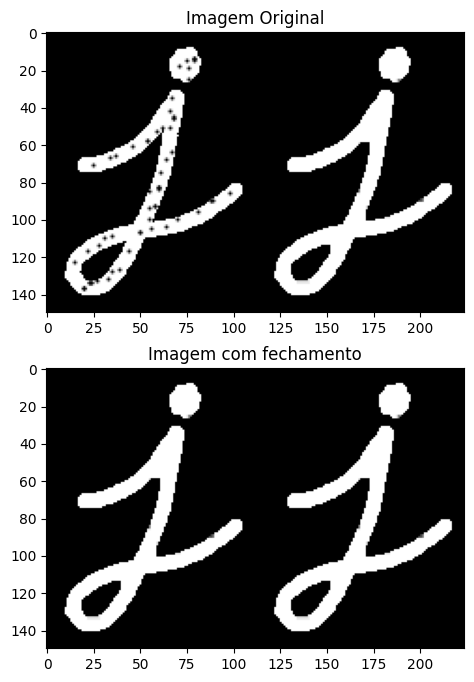

In [ ]:
img = cv2.imread('/content/closing.png')

kernel = np.ones((5,5),np.uint8)
abertura = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
plt.imshow(img)
plt.title("Imagem Original")

ax2 = fig.add_subplot(212)
plt.imshow(abertura)
plt.title("Imagem com fechamento")

plt.show()